In [44]:
import os
from data.CRSPLoader import CRSPLoader
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1

In [50]:
source_path = os.getcwd()
etf_tickers = ['SPY', 'XLF', 'XLB', 'XLK', 'XLV', 'XLI', 'XLU', 'XLY', 'XLP', 'XLE']
num_feat_names = ['pvCLCL']
cat_feat_names = []
window_length = 50
step_length = 1

etfs_check = pd.read_csv(os.path.join(source_path, "data", "inputs", "etfs_check.csv"))
etfs_check['date'] = pd.to_datetime(etfs_check['date'])
etfs_check.set_index('date', inplace=True)

In [34]:
# prepare dataset
loader = CRSPLoader(load_data=True,
                    load_path=os.path.join(source_path, "data", "inputs"),
                    load_edge_data=True,
                    num_feat_names=num_feat_names,
                    cat_feat_names=cat_feat_names)
loader._update_ticker_index(ticker_list=etf_tickers)
dataset = loader.get_dataset(data=loader.select_tickers(tickers=etf_tickers),
                                window_length=window_length,
                                step_length=step_length)

Loading in saved CRSP data...


/Users/danieloliveira/Documents/Daniel/codes/graph-portfolio-opt/src/data/CRSPLoader.py:41: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  self._load_data(self.load_path)


Monthly Edge data only!
Generating edge weights from raw data...


Loading edge files: 100%|██████████| 245/245 [00:14<00:00, 16.64it/s]


Generating CRSP dataset...
Generating feature matrix...


100%|██████████| 5740/5740 [00:10<00:00, 546.67it/s]


Generating target matrix...


100%|██████████| 5531/5531 [00:03<00:00, 1411.42it/s]


In [39]:
returns_df = loader.X

returns_df.tail()

,SPY,XLF,XLB,XLK,XLV,XLI,XLU,XLY,XLP,XLE
2021-12-27,0.014152,0.010304,0.015061,0.021452,0.010553,0.010585,0.004877,0.009745,0.010631,0.021858
2021-12-28,-0.000817,0.000510,0.005801,-0.005208,-0.002628,0.005047,0.008992,0.000439,0.005654,-0.000713
2021-12-29,0.001279,-0.001274,0.004104,0.000854,0.005698,0.001800,0.005376,0.001997,0.004576,-0.006422
2021-12-30,-0.002765,-0.001786,-0.003535,-0.006595,0.002054,-0.003594,0.003658,-0.003598,-0.003124,-0.006104
2021-12-31,-0.002520,-0.001789,0.004434,-0.004865,-0.004241,0.004271,0.003505,-0.002391,0.006789,0.002529


<Axes: >

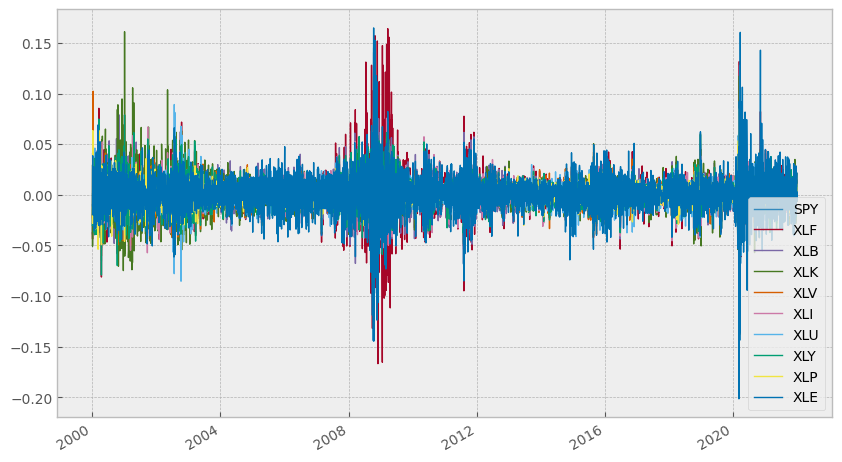

In [40]:
returns_df.plot(figsize=(10, 6))

<Axes: >

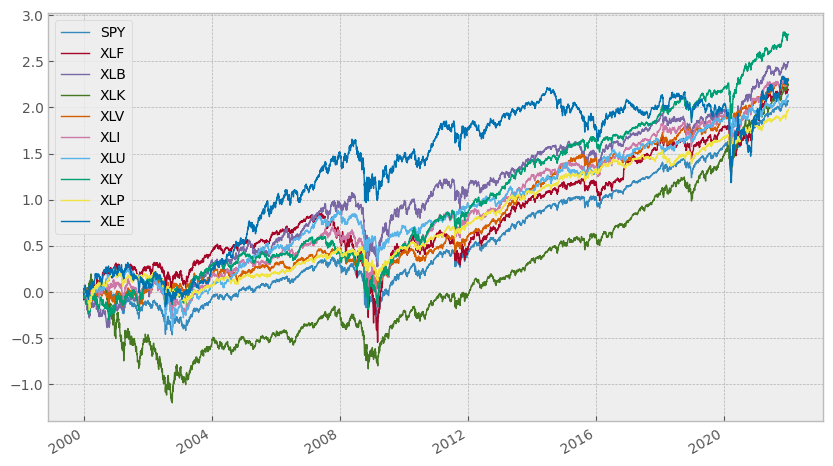

In [41]:
returns_df.cumsum().plot(figsize=(10, 6))

<Axes: >

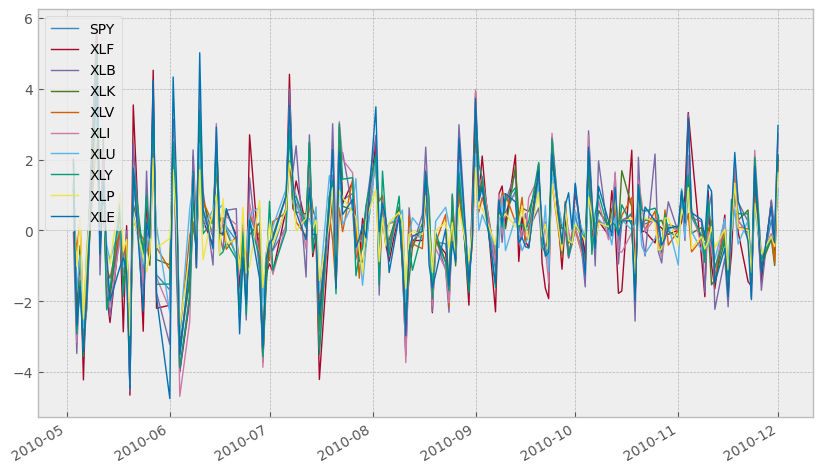

In [57]:
(returns_df.loc["2010-05-01":"2010-12-01"]*100).plot(figsize=(10, 6))

<Axes: xlabel='date'>

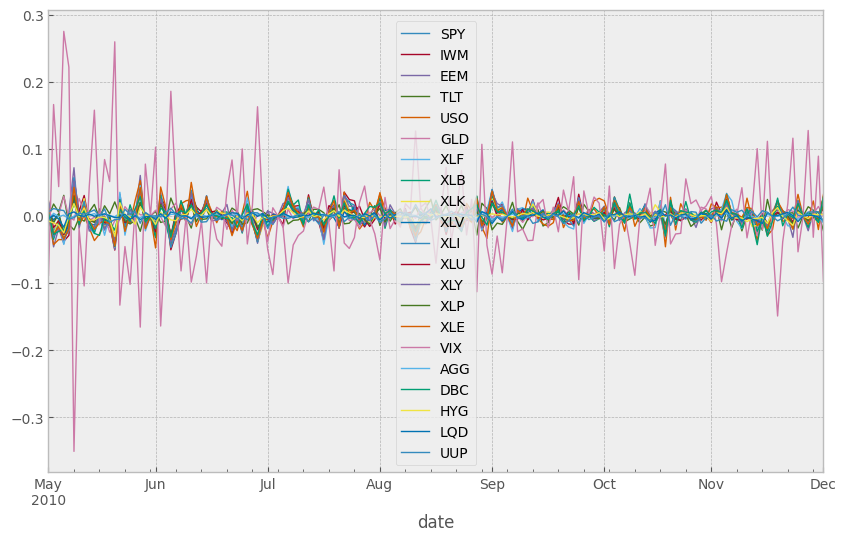

In [55]:
etfs_check.loc["2010-05-01":"2010-12-01"].plot(figsize=(10, 6))

<Axes: xlabel='date'>

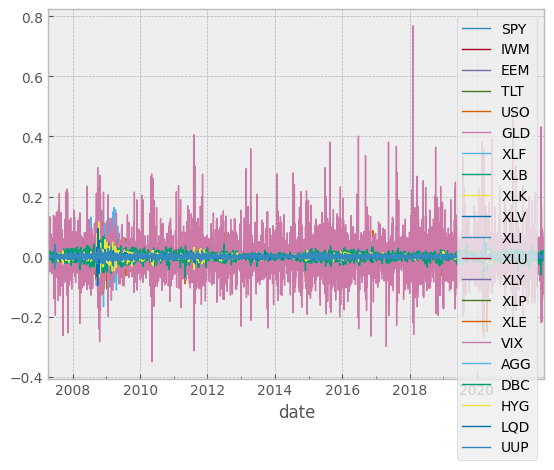

In [56]:
etfs_check.plot()